<a href="https://colab.research.google.com/github/bnf99/FiscaComputacional1/blob/main/Tarea_TS13_BryamN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea semana 13: Métodos de Monte Carlo.
## IF4702 - Física computacional 1 

### Profesores:
> Álvaro Amador Jara

> José Esteban Pérez Hidalgo  

### Estudiante:
> Bryam Gerardo Núñez Flores (2018111986)

### Repositorio:
> [github.com/bnf99/FiscaComputacional1](https://github.com/bnf99/FiscaComputacional1)

### Por cuestiones de formato se recomienda revisar este documento desde el repositorio en Github, Google Collab (se conecta directamente desde el repositorio) o un lector de documentos .ipynb. 

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c as c0
import pandas as pd
import plotly.express as px

# Simulación Monte Carlo: Difusión de fotones en el sol.

La mayor parte de la energía de fusión generada por el sol se produce en su
centro. El proceso que probablemente domina la transferencia de energía en la
región más externa del Sol es la convección. Sin embargo, se especula que la
energía es transportada en las regiones internas (hasta un radio $R= 5\times 10^{8}$m) a través de un camino aleatorio de fotones de rayos $X$. Un fotón es un paquete de energía cuantizado que se mueve a velocidad $c$. El camino libre medio para un fotón es $l=5\times 10^{-5}$m.

>  Escriba una simulación de fotones ejecutando un camino aleatorio según
las condiciones indicadas. Asuma que el fotón da pasos de igual distancia
en direcciones aleatorias en espacio tridimensional.

> Estime el número de pasos $N$ de longitud $l$ que debe dar un fotón hasta
alcanzar el radio $R$, usando el concepto de la raíz cuadrática media de la
distancia.

> Estime la cantidad de pasos necesarios para que el fotón alcance el radio $R$
ejecutando su simulación un número arbitrario de veces y promedie para
eliminar fluctuaciones en la simulación estocástica. Compare su resultado
con la estimación original y comente sus resultados.

> Calcule los años que tarda un fotón en escapar de la región interna donde
el transporte de energía no es dominado por la convección.

> Grafique la trayectoria de un fotón y muestre cuándo alcanza la distancia $R$.

>  Observe la trayectoria del fotón. ¿Es la trayectoria un fractal? Comente.

## Pseudocódigo:
1. Se definen los parámetros del problema.
2. Se crea una función que genera el camino aletorio, por medio de un vector unitario que cambia de dirección siguiendo una distribución normal de forma aletoria. 
3. Se crea una función que evalua múltiples veces el camino aletorio para encontrar un valor promedio a la cantidad de pasos necesarios para recorrer la distancia $R$.
4. Se comenta sobe el valor promedio obtenido y el valor teórico. 
5. Se calcula la cantidad de años que tarda un fotón en escapar de la región interna, utilizando el valor promedio de pasos.
6. Se grafíca la trayectoria aletoria y se comenta sobre la naturaleza fractal de la misma.

## Consideraciones teóricas y prácticas:

Landau (2008) nos dice que:
$$R_{rms}\simeq \left\langle \Delta x_{1}^{2}+..+ \Delta x_{n}^{2}+ \Delta y_{1}^{2} +..+ \Delta y_{n}^{2}+ \Delta z_{1}^{2}+..+ \Delta z_{n}^{2}\right\rangle$$
$$R_{rms}\simeq \sqrt{N}r_{rms}$$

Por ende se sabe que teóricamente la cantidad de pasos necesarios para ejecutar la simulación correspode a:
$$N_{teórico}=\left( \frac{R}{l} \right)^{2}=1\times10^{26} $$

Como podemos ver esto es una gran cantidad de pasos lo cual requiere un mayor capacidad computacional de la que se cuenta, por ende se propone una alternativa para resolver el problema.

De esta forma sea:
$$N_{simulación}=m^{2}n$$
$$m=\frac{L}{l}$$

Donde $n$ representa la cantidad de pasos ejecutados por la computadora y $L$ es un valor arbitrario que cumple que $L\gg l $ aliviando así la carga computacional.

De esta forma la solución propuesta se ajusta a la capacidad computacional del ordenador que se utilice. Por lo que si se tiene $m=1$ el problema se resuelve en las condiciones propuestas originalmente.

In [265]:
"""
Parámetros del problema
"""
R_rms = 5e8
l = 5e-5
m1 = 1e11
m2 = 95e10
vel_luz = c0
kProm = 10

In [301]:
def Camino_Aletorio(m,R):
  """
  ______________________________________________________________________________
  Descripción:
  Esta función genera un camino aletorio para el fotón y permite calcular los 
  pasos necesarios para alcanzar la distancia R
  ______________________________________________________________________________
  Parámetros de entrada:
  m = coeficiente que permite analizar distancias más grande reduciendo así el 
  peso computacional del problema.
  R = radio que se desea alcanzar.
  ______________________________________________________________________________
  Parámetros de salida:
  n = cantidad de pasos que le tomó al ordenador para alcanzar la distancia R
  N = cantidad de pasos equivalente si se hubiese utilizado la distancia l.
  posicion = arreglo con la posición del fotón. 
  ______________________________________________________________________________
  """
  posicion = [np.zeros(3)] #posición del fotón, empieza en (0,0,0).
  deltaR2 = [] # diccionario que se utiliza para calcular el valor R_rms
  r_rms = 0 #valor inicial de R_rms
  n = 0 #contador de iteraciones 
  L = l*m #camino libre medio modificado 
  while r_rms < R:
    n += 1
    # generación del vector unitatio aletorio
    np.random.seed(abs(int(1e5*np.random.standard_normal()))) #semilla aletoria
    x,y,z = np.random.normal(0,np.random.randint(1000),3) #puntos aletorios
    r = np.sqrt(x**2+y**2+z**2)
    u = np.array([x/r,y/r,z/r])
    # vector de desplazamiento 
    movimiento_aletorio = L*u
    # nueva posición 
    nueva_posicion = posicion[n-1] + movimiento_aletorio
    # se guarda la nueva posición 
    posicion.append(nueva_posicion)
    # se estima el valor R_rms 
    deltaR2_x = (posicion[n][0]-posicion[n-1][0])**2
    deltaR2_y = (posicion[n][1]-posicion[n-1][1])**2
    deltaR2_z = (posicion[n][2]-posicion[n-1][2])**2
    deltaR2.append([deltaR2_x,deltaR2_y,deltaR2_z])
    r_rms = np.sqrt(np.sum(deltaR2))
  #valor de pasos equivalente  
  N = (m**2)*n
  return n,N,np.array(posicion)

In [254]:
n,N,posicion = Camino_Aletorio(m,R_rms)

In [304]:
def PromedioPasos(m,R,kProm):
  """
  ______________________________________________________________________________
  Descripción:
  Esta función calcula el valor promedio de los pasos requeridos para alcanzar
  la distancia R.
  ______________________________________________________________________________
  Parámetros de entrada:
  m = coeficiente que permite analizar distancias más grande reduciendo así el 
  peso computacional del problema.
  R = radio que se desea alcanzar.
  kProm = cantidad de veces que se calcula N para generar un promedio.
  ______________________________________________________________________________
  Parámetros de salidad:
  Valor promedio de N
  """
  pasos = []
  for i in range(kProm):
    #semilla aletoria
    np.random.seed(abs(int(1e5*np.random.standard_normal())))
    _,ipasos,_ = Camino_Aletorio(m,R)
    pasos.append(ipasos)
  return np.average(pasos)

In [305]:
promedio = PromedioPasos(m2,R_rms,kProm)
promedio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning:

invalid value encountered in double_scalars



9.557475e+25

### Comparación:
Como podemos apreciar se obtuvo un valor aproximado de $9.557475\times 10^{25}$ iteraciones para alcanzar la distancia R. 

De la discución **previa** sabemos que el valor teórico corresponde a $1\times 10^{26}$ por lo que podemos ver que el método propuesto se aproxima bastante a las solución. Podemos intuir que las diferencias se deben al comportamiento aletorio de la simulación y a la falta de más valores para promediar.

### Estimación de los años:

In [274]:
segundos = (promedio*l/vel_luz)
años = segundos/(365*24*60**2)
años

529801.1343656912

### Representación gráfica:

In [277]:
df = pd.DataFrame({"x [m]":posicion[:,0],"y [m]":posicion[:,1],"z [m]":posicion[:,0]})

In [278]:
fig = px.line_3d(df, x='x [m]', y='y [m]', z='y [m]')

fig.show()

### Naturaleza fractal:

Como podemos ver se obtiene un fractal sin duda alguna, sin embargo hay que tomar en cuenta varios factores de la simulación para explicar la forma del mismo.

Primero tenemos que notar que la forma de este fractal está ampliamente relacionado con la distribución que se utilizó (x,y,z = np.random.normal(0,np.random.randint(1000),3)) si se hubiese escogido otra distribución se obtendrían otros resultados completamenten distintos.

Por ejemplo si se utiliza "x,y,z = np.random.random(3)" se obtiene un valor que se parece más a una línea recta.Por otro lado si se escoge "x,y,z = np.random.randint(3)" la forma será de nuevo distinta.

También si se cambian los valores de m la forma varía y no necesariamente tiene un comportamiento de fractal, no obstante se muestra este resultado debido a que enseña que es posible tener un comportamiento de fractal de un proceso aletorio.


# Simulación Metrópoli-Monte Carlo: 

Tomando como base la simulación del modelo de Ising en 1-D trabajado en clase,
realice lo siguiente:

> Modifique la simulación para calcular la energía interna y magnetización del
sistema de espines.

> Espere a que las simulaciones entren en equilibrio y calcule los valores de
energía y magnetización para un solo valor de temperatura.


> Reduzca las fluctuaciones haciendo varias ejecuciones de la simulación para
el mismo valor de temperatura y haciendo un promedio entre ellas para
determinar el valor de energía y magnetización.


> Realice las simulaciones para diferentes configuraciones iniciales de los espines (todos en una sola dirección arriba y abajo, así como la configuración
inicial aleatoria).


>  Grafique la energía interna $U$ para $0 < k_{B}T \le 5$. Obtenga el gráfico U en función de $k_{B}T$ correspondiente. Compare con los resultados analíticos.

> Grafique la magnetización $\mathcal{M}$ para $0 < k_{B}T \le 5$. Obtenga el gráfico $\mathcal{M}$ para función de $k_{B}T$  correspondiente. Compare con los resultados analíticos.

> Compute las fluctuaciones de la energía $U_{2}$ y el calor específico $C$ para $0 < k_{B}T \le 5$ . Obtenga el gráfico $C$ en función de $k_{B}T$ correspondiente. Compare los resultados de su simulación con los resultados analíticos.


## Pseudocódigo:

1. Se crea una función que permita generar el estado inicial de los espines, ya sean aletorios, todos apuntando hacia arriba o hacia abajo.
2. Se crea una función que permita calcular la energía y magnetización para un arreglo de espines dados.
3. Se crea una función que implemente la  evolución del sistema de espines despues de nPasos para una temperatura dada, siguiendo el algoritmo de metrópoli-Monte Carlo y que al final de el valor promedio de la energía y magnetización.
4. Se crea una función que permita iterar múltiples veces la evolución de los espines para así encontrar un valor promedio de las propiedades del sistema para una temperatura dada.
5. Se crea una función que calcule las propiedades del sistema para un intervalo kT utilizando las funciones previamente definidas.
6. Se crea una función que calcule los valores teóricos de las propiedades del sistema en un intervalo kT.
7. Se grafican los resultdos.

In [2]:
def arregloInicial(nEspines,config):
  """
  __________________________________________________________________________
  Descripción:
  Esta función da el arreglo de espines inicial, dada una configuración.
  Cuando config = 1 se tiene todos los espines para arriba. 
  Cuando config = -1 se tiene todos los espines para abajo.
  para otro valor de config  los espines se arreglan de forma aleatoria.
  __________________________________________________________________________
  Parámetros de entrada:
  nEspines = número de espines
  config:
  config = 1 => todos los espines hacia arriba
  config = -1 => todos los espines hacia abajo
  confg distinto de 1 y -1 implica espines con orden aleatorio.
  __________________________________________________________________________
  Parámetros de salida:
  La función da como resulta el un np.array de 1, -1 o combinación de ambos 
  dada una configuración inicial
  __________________________________________________________________________
  """
  # Espines hacia arriba
  if config == 1:
    arregloFinal = np.ones(nEspines)
  # Espines hacia abajo 
  elif config == -1:
    arregloFinal = np.ones(nEspines)*config
  #Espines aletorios 
  else:
    arregloAletorio = np.random.randint(0,2,size=nEspines)
    arregloFinal = np.ones(nEspines)
    for i in range(nEspines):
      if arregloAletorio[i] == 1:
        arregloFinal[i] = 1
      else:
        arregloFinal[i] = -1
  return arregloFinal

def Energia_Magnetizacion_arreglo(arreglo,j):
  """
  _____________________________________________________________________
  Descripción:
  Esta función da la energía y magnetización de un arreglo de espines.
  _____________________________________________________________________
  Parámetros de Entrada:
  arreglo = arreglo de espines 
  j = energía de intercambio (ferromagnético o antiferromagnético)
  _____________________________________________________________________
  Parámetros de salida:
  Valor de energía y magnetización del arreglo de espines.
  _____________________________________________________________________
  """
  # Valor de magnetización del arreglo
  magnetizacion = np.sum(arreglo)
  # Contador inicial de energía
  energia = 0
  # Cálculo de la energía
  for i in range(0,len(arreglo)-1):
    energia += arreglo[i]*arreglo[i+1]
  energia = -j*energia
  return energia, magnetizacion

def Evolucion_Sistema(nEspines,configInicial,nPasos,kT,j):
  """
  ___________________________________________________________________
  Descripción:
  Esta función implementa el algoritmo metrópolis para encontrar 
  la evolución en el tiempo de un sistema de espines.
  __________________________________________________________________
  Parámetros de entrada:
  nEspines = número de espines
  configInicial = configuración inicial de los espines
  nPasos = cantidad de pasos en el tiempo
  kT = constante de BoltzMann por temperatura
  j = energía de intercambio (ferromagnético o antiferromagnético)
  __________________________________________________________________
  Parámetros de salidad:
  -valor promedio de la energía 
  -valor promedio de la magnetización
  ___________________________________________________________________
  """
  # Configuración inicial de los espines
  arregloEspines = arregloInicial(nEspines,configInicial)
  # Valor inicial de la energía y magnetización
  energia, magnetizacion = Energia_Magnetizacion_arreglo(arregloEspines,j)
  # Diccionarios donde se guarda la evolución del sistema 
  evol_energia = []
  evol_magnetizacion = []
  evol_espines = []
  # Evolución en el tiempo con el algoritmo metrópolis 
  for i in range(nPasos):
    # Energía y magnetización en el paso i-ésimo 
    iEnergia, iMagnetizacion =  Energia_Magnetizacion_arreglo(arregloEspines,j)
    # Se selecciona un espin aletorio 
    iEspin = np.random.randint(nEspines)
    # Se cambia el estado del espin seleccionado
    arregloEspines[iEspin] *= -1
    # Se calcula las propiedades del estado modificado 
    jEnergia, jMagnetizacion = Energia_Magnetizacion_arreglo(arregloEspines,j)
    # Se calcula la diferencia de energía para determinar si se acepta el cambio 
    deltaE = jEnergia-iEnergia
    # Se define la probabilidad de aceptar el cambio si deltaE > 0
    prob_aceptar = np.exp(-deltaE/kT)
    # Proceso de rechazo o aceptación del cambio 
    if deltaE > 0:
      # Condición donde se acepta el cambio si deltaE > 0
      if np.random.random() < prob_aceptar:
        evol_energia.append(jEnergia)
        evol_magnetizacion.append(jMagnetizacion)
      # Condición donde se rechaza el cambio si deltaE > 0
      else:
        arregloEspines[iEspin] *= -1
        evol_energia.append(iEnergia)
        evol_magnetizacion.append(iMagnetizacion)
    # si deltaE < 0 se acepta el cambio
    else:
      evol_energia.append(jEnergia)
      evol_magnetizacion.append(jMagnetizacion)
    # Nuevo arreglo de espines
    evol_espines.append(arregloEspines.copy())
  # Valores en la evolución 
  evol_energia = np.array(evol_energia)
  evol_espines = np.array(evol_espines)
  evol_magnetizacion = np.array(evol_magnetizacion)
  # Valores promediados
  return np.average(evol_energia[int(len(evol_energia)/2):]), np.average(evol_magnetizacion[int(len(evol_magnetizacion)/2):])

def Valores_promedio(temp,configInicial):
  """
  ______________________________________________________________________
  Descripción:
  Esta función calcula el valor promedio de la energía, magnetización y
  energía interna**2 para un valor de temperatura.
  Cabe mencionar que la cantidad de iteraciones para promediar se recibe 
  como un parámetro general y no como un valor de la función.
  ______________________________________________________________________
  Parámetros de entrada:
  temp = temperatura (kT) a la cual se desea obtener un valor promedio
  configInicial = configuración inicial de los espines
  ______________________________________________________________________
  Parámetros de salida:
  valor promedio a una temperatura dada de:
  -energía
  -magnetización
  -energía interna**2
  ______________________________________________________________________ 
  """
  # Diccionarios donde se guardan los valores promedio después de nPasos
  energia = []
  magnetizacion = []
  energia2 = []
  # Cálculo de los valores nProm veces
  for i in range(nProm):
    iEnergia, iMag = Evolucion_Sistema(nEspines,configInicial,nPasos,temp,j)
    energia.append(iEnergia)
    magnetizacion.append(iMag)
    energia2.append(iEnergia**2)
  energia = np.array(energia)
  magnetizacion = np.array(magnetizacion)
  energia2 = np.array(energia2)
  # Valores promediados para una temperatura
  return np.average(energia), np.average(magnetizacion), np.average(energia2)

def Valores_promedio_en_intervalo_kT(configInicial):
  """
  ___________________________________________________________________________
  Descripción:
  Esta función calcula los valores de energía interna, magnetización y calor
  espcífico para un intervalo kT dado y una configuración inicial dada.
  ___________________________________________________________________________
  Parámetros de entrada:
  configInicial = configuración inicial de los espines.
  __________________________________________________________________________
  Parámetros de salida:
  np.array con los valores promedio en el intervalo kT
  __________________________________________________________________________
  """
  # Se evaluan 50 puntos equiespaciados en el intervalo
  kT = np.linspace(0,intervalo_kT,50) 
  # Diccionarios donde se almacenan los datos
  energia = []
  magnetizacion = []
  u2 = []
  c = []
  # Evaluación de los datos
  for i in range(len(kT)):
    iEnergia,iMag,iU2 = Valores_promedio(kT[i],configInicial)
    energia.append(iEnergia)
    magnetizacion.append(iMag)
    u2.append(iU2)
    p =(iU2-iEnergia**2)/(kT[i]**2)
    c.append(p/nEspines**2)
  energia = np.array(energia)
  magnetizacion = np.array(magnetizacion)
  u2 = np.array(u2)
  c = np.array(c)
  # np.array con los valores promedio en el intervalo kT
  return energia, magnetizacion, u2, c

def solucion_analitica(J,B,kT,nEspines):
    """
    _________________________________________________________________
    Descripción:
    Cálculo de los valores analíticos de las propiedades del sistema
    _________________________________________________________________
    Parámetros de entrada:
    j = energía de intercambio
    B = campo magnético
    kT = temperatura
    nEspines = número de espines   
    _________________________________________________________________
    Parámetros de salida:
    valores analíticos de:
    -energía interna
    -magnetización 
    -calor específico
    _________________________________________________________________
    """
    p = J/kT
    U = -nEspines*J*np.tanh(p) # energía interna
    C = (p**2)/(np.cosh(p)**2) # calor específico
    # Magnetización
    M = (nEspines*np.exp(p)*np.sinh(B/kT))/(np.sqrt(np.exp(2*p)*(np.sinh(B/kT)**2)+np.exp(-2*p)))
    
    return U, M, C

In [3]:
"""
Parámetros de la simulación:
"""
nEspines = 100 #número de espines 
j = 1 #energía de intercambio (ferromagnético o antiferromagnético)
nPasos = 2000 #(pasos en la evolución del sistema)
nProm = 10 #(veces que se itera para promediar valores)
intervalo_kT = 5 #(límite superior del intervalo kT)
kT = np.linspace(0,5,50) #(array con los valores de kT)
B = 0 # campo magnético 

In [4]:
e_1,m_1,u2_1,c_1 = Valores_promedio_en_intervalo_kT(1)
e_n1,m_n1,u2_n1,c_n1 = Valores_promedio_en_intervalo_kT(-1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:191: RuntimeWarning: invalid value encountered in double_scalars


In [5]:
e_T,m_T,c_T = solucion_analitica(j,B,kT,nEspines)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:219: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:223: RuntimeWarning: invalid value encountered in true_divide


In [6]:
e_r,m_r,u2_r,c_r = Valores_promedio_en_intervalo_kT(0)
c_r[0:4]=0 # se eliminan los primeros 4 valores porque son valores atípicos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:191: RuntimeWarning: divide by zero encountered in double_scalars


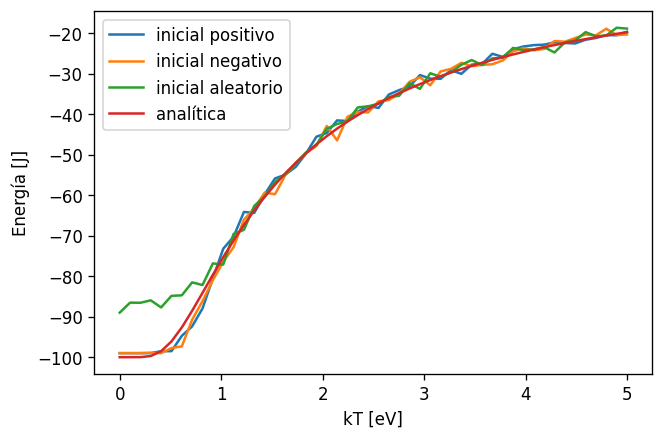

In [7]:
plt.figure(dpi=120)
plt.plot(kT,e_1)
plt.plot(kT,e_n1)
plt.plot(kT,e_r)
plt.plot(kT,e_T)
plt.legend(['inicial positivo','inicial negativo','inicial aleatorio','analítica'])
plt.xlabel('kT [eV]')
plt.ylabel('Energía [J]')
plt.show()


## Comentarios de la Energía:
 
La solción analítica surge de la ecuación 15.7 del libro de texto y podemos ver que en general para todas las condiciones tenemos una buena aproximación a los resultados analíticos. 

Si observamos con detenimiento la energía inicial del arreglo aletorio difiere  un poco más que sus contrapartes, sin embargo esto se explica debido a que el arreglo aletorio tiene un conjunto de espines desordenados por lo que su energía inicial siempre va a variar, generando así una discrepancia a la solución analítica, positiva y negativa.

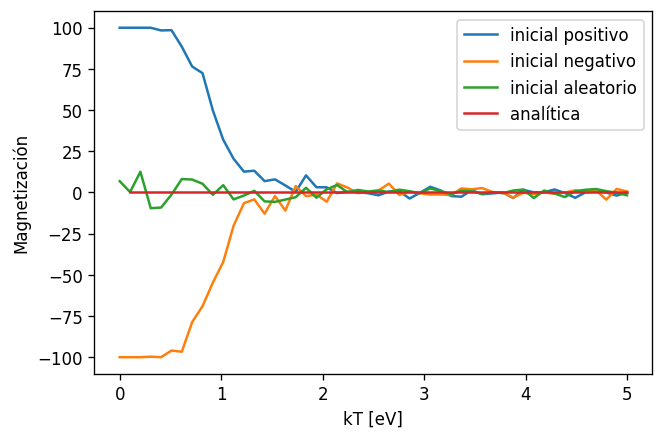

In [306]:
plt.figure(dpi=120)
plt.plot(kT,m_1)
plt.plot(kT,m_n1)
plt.plot(kT,m_r)
plt.plot(kT,m_T)
plt.legend(['inicial positivo','inicial negativo','inicial aleatorio','analítica'])
plt.xlabel('kT [eV]')
plt.ylabel('Magnetización')
plt.show()

## Comentarios de la magnetización:

La solución analítica de la magnetización está dada en el libro, en la ecuación 15.9. Se obtiene un valor de cero debido a que no se toma un campo magnético externo sobre el sistema. Podemos ver como las tres soluciones rápidamente convergen a cero con el aumento de temperatura lo cual es el comportamiento esperado.


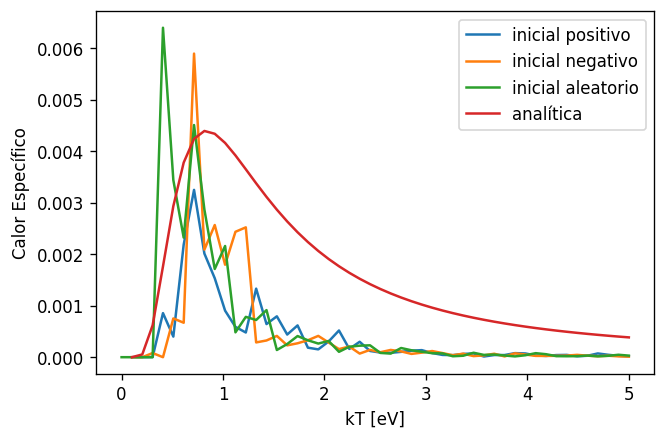

In [307]:
plt.figure(dpi=120)
plt.plot(kT,c_1)
plt.plot(kT,c_n1)
plt.plot(kT,c_r)
plt.plot(kT,c_T/100)
plt.legend(['inicial positivo','inicial negativo','inicial aleatorio','analítica'])
plt.xlabel('kT [eV]')
plt.ylabel('Calor Específico')
plt.show()

## Comentarios del calor específico:

Podemos ver como las tres configuraciones se ajustan al comportamiento de la solución analítica (ecuación 15.8 del libro de texto) sin embargo es importante mencionar dos detalles de los resultados obtenidos.

El primero es que, aunque el comportamiento de los sistemas es similar a la solución analítica no son así los valores, esto debido a que se tuvo que dividir entre 100 para que la solución analítica diera valores similares a los que se obtuviero con la simulación. Esto se puede deber a algún error en las fórmulas propuestas en el libro sin embargo no se ha confirmado que esta sea la causa oficial.

Por otro lado se eliminaron los primeros cuatro valores de la configuración aletoria, esto debido a que dichos datos divergen a infinito o son ordenes de magnitud mayores a los otros 46 datos calculados. De esta forma se consideran valores atípicos y se eliminaron para presentar la similitud con la solución analítica fuera de estos valores problemáticos.

# Referencias bibliográficas:

1. Landau, R. H., Páez, J., & Bordeianu, C. C. (2008). A Survey of Computational Physics: Introductory Computational Science. Princeton: Princeton University Press.
